### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [109]:
# Import Necessary Libraries

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text

### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [110]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv('pet_adoption_data.csv')

# Step 2: Display the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]} ")

Number of rows: 2007
Number of Columns: 13 


In [111]:
df.head()

,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [112]:
# Step 4: Drop the columns that do not add much value to the analysis
df = df.drop(columns=['pet_id'])

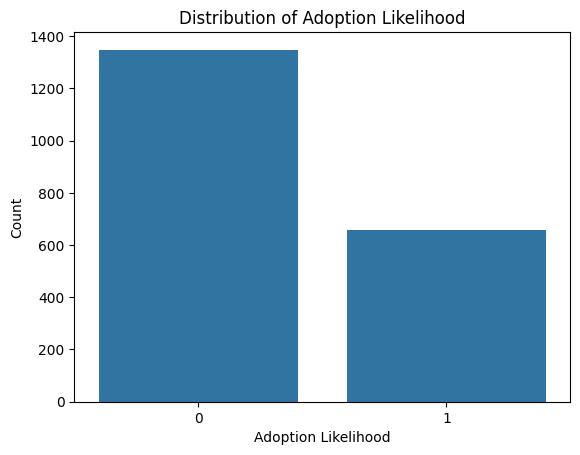

In [113]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart

sns.barplot(df.adoption_likelihood.value_counts())
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.title('Distribution of Adoption Likelihood')
plt.show()

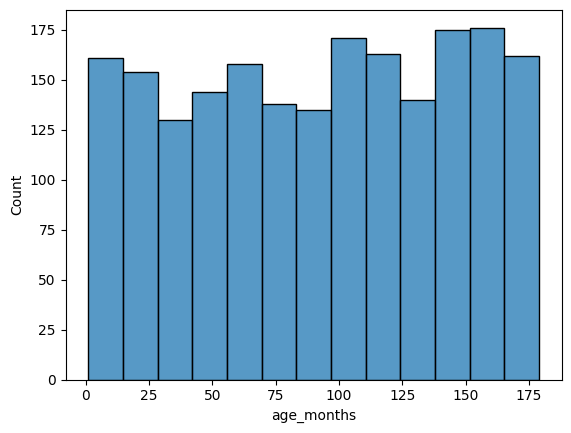

In [114]:
# Step 6: Visualize the distribution of 'age_months' using a histogram

sns.histplot(df.age_months)
plt.show()

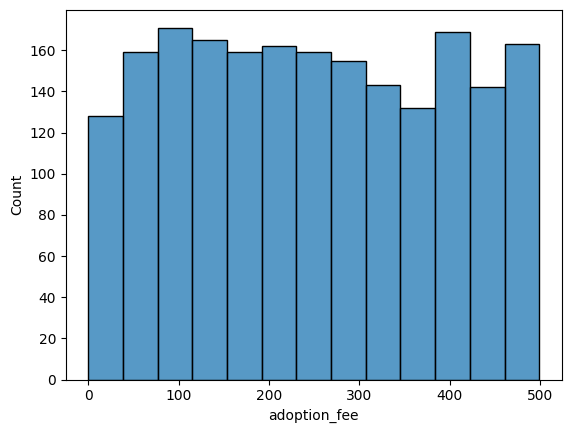

In [115]:
# Step 7: Visualize the distribution of 'adoption_fee' using a histogram

sns.histplot(df.adoption_fee)
plt.show()

In [116]:
df.isnull().sum()

pet_type               0
breed                  0
age_months             0
color                  0
size                   0
weight_kg              0
vaccinated             0
health_condition       0
timein_shelter_days    0
adoption_fee           0
previous_owner         0
adoption_likelihood    0
dtype: int64

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [117]:
# Step 1: Encode the categorical variables

# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).


# Encode 'color', 'pet_type' and 'breed' using one-hot encoding


In [118]:
df.head(2)

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0


In [119]:
def get_size(row):
    if row['size'] == 'Small':
        return 0
    elif row['size'] == 'Medium':
        return 1
    else:
        return 2

df['size'] = df.apply(get_size, axis=1)

In [120]:
df['size'].value_counts()

size
1    714
0    663
2    630
Name: count, dtype: int64

In [121]:
df = pd.get_dummies(df, columns=['breed', 'pet_type', 'color'], drop_first=True)

In [122]:
# Step 2: Scale the numerical features

# Scale 'weight_kg' using MinMaxScaler



# Scale 'adoption_fee' using StandardScaler


In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce')
# df['adoption_fee'] = pd.to_numeric(df['adoption_fee'], errors='coerce')

scaler = StandardScaler()
min_max = MinMaxScaler()

df['weight_kg'] = scaler.fit_transform(df[['weight_kg']])
df['adoption_fee'] = min_max.fit_transform(df[['adoption_fee']])

In [124]:
# step3: Display the first few rows of the updated dataset.

df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,color_Brown,color_Gray,color_Orange,color_White
0,131,2,-1.281098,1,0,27,0.280561,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False
1,73,2,0.045756,0,0,8,0.470942,0,0,False,False,False,False,True,False,False,False,True,False,False,False,True
2,136,1,-1.637043,0,0,85,0.771543,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
3,97,0,-1.485328,0,0,61,0.434870,1,0,False,True,False,False,False,False,False,False,False,False,False,False,True
4,123,2,0.575608,0,0,28,0.028056,1,0,False,False,False,False,True,False,False,False,True,False,True,False,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [125]:
# Step 1: Select the features and the target variable for modeling
x = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']


# Step 2: Split the data into training and test sets with a test size of 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [126]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data

model = DecisionTreeClassifier()
model.fit(x_train, y_train)


# Step 4: Print the model's accuracy score on the test data

model.score(x_test, y_test)

0.8706467661691543

In [127]:
# Step 5: Make predictions on the test set
y_pred = model.predict(x_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       403
           1       0.77      0.87      0.82       200

    accuracy                           0.87       603
   macro avg       0.85      0.87      0.86       603
weighted avg       0.88      0.87      0.87       603



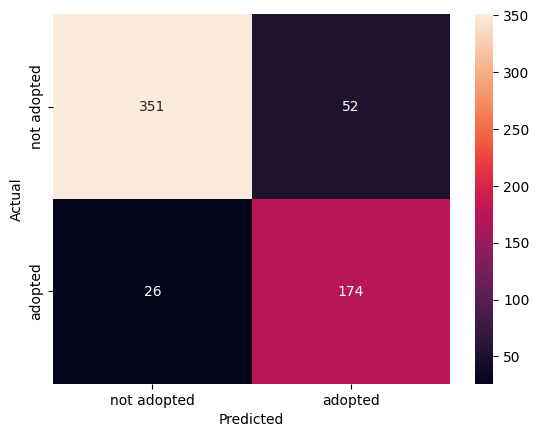

In [128]:
# Step 7: Visualize the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, fmt='d', annot=True, xticklabels=['not adopted', 'adopted'], yticklabels=['not adopted', 'adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [129]:
# Step 1: Train the Decision Tree model with specified hyperparameters

new_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)
new_model.fit(x_train, y_train)

# Step 2: Print the model's accuracy score on the test data
score = new_model.score(x_test, y_test)
print(score)

# Step 5: Make predictions on the test set
y_pred_new = new_model.predict(x_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
report = classification_report(y_test, y_pred_new)
print(report)

0.9054726368159204
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603



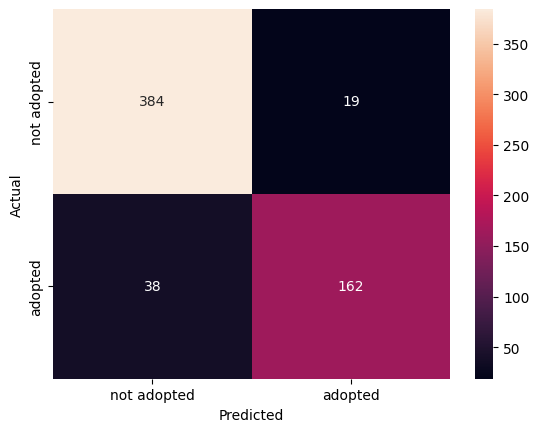

In [130]:
# Step 5: Visualize the confusion matrix

cm = confusion_matrix(y_test, y_pred_new)

sns.heatmap(cm, fmt='d', annot=True, xticklabels=['not adopted', 'adopted'], yticklabels=['not adopted', 'adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [136]:
# Step 6: Visualize the decision tree

from sklearn.tree import export_text

print(export_text(model, feature_names=list(x.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- adoption_fee <= 0.06
|   |   |   |--- class: 1
|   |   |--- adoption_fee >  0.06
|   |   |   |--- size <= 1.50
|   |   |   |   |--- size <= 0.50
|   |   |   |   |   |--- age_months <= 28.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age_months >  28.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- size >  0.50
|   |   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |   |--- health_condition <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- health_condition >  0.50
|   |   |   |   |   |   |   |--- breed_Labrador <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- breed_Labrador >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |   |--- pet_type_Dog <= 0.50
|   |   |   |   |   |   |   |--- breed_Siamese <= 0.50
|   |   |   |   |   |   |   |   |--- cla

In [134]:
print(export_text(new_model, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 0.50
|   |   |   |--- color_White <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- color_White >  0.50
|   |   |   |   |--- class: 0
|   |   |--- size >  0.50
|   |   |   |--- size <= 1.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  1.50
|   |   |   |   |--- adoption_fee <= 0.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  0.36
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- color_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- color_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 1.50
